


# Prediction of Credit Score

---

In [1]:
# Importing neccesary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys

# Library to split data
from sklearn.model_selection import train_test_split

# Library to remove the mean and scales each feature/variable to unit variance
from sklearn.preprocessing import StandardScaler

# Libraries and modules for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Library to measure any distortion in our dataset as a result of Imputation
from sklearn.metrics import mean_squared_error

### <font color='lightgreen'>Importing Libraries and modules for Machine Learning

In [2]:
# Installing missingpy library for imputing missing values
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.1 MB/s 


In [3]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [4]:
# Library to fill in missing values in a dataset using the k-Nearest Neighbors method
from sklearn.impute import KNNImputer
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
# Importing the MissForest class
from missingpy import MissForest

# Libraries and modules for Machine Learning

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For K Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier
# For Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# For Random Forests
from sklearn.ensemble import RandomForestClassifier
# For forward stepwise selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


### <font color='lightgreen'>Importing and Reading the Dataset from Excel Sheet

---


**<font color='lightyellow'>Risk Data Review** denotes a process of systematic analysis of the relevant Risk Data used by an organization towards <br>
**Data Collection** : 
To obtain data that can be used to support decision-making, a suitable dataset must be gathered.<br>
Data collection is a procedure that is extremely context-sensitive (it depends on the current systems, databases, and their schemas, operating systems, and other systems that store credit data). <br>
Our data is presented here as an excel sheet.

In [5]:
# Importing dataset from system
from google.colab import files

uploaded = files.upload()

Saving a_Dataset_CreditScoring.xlsx to a_Dataset_CreditScoring.xlsx


In [6]:
# Reading the dataset into a dataframe
df = pd.read_excel("a_Dataset_CreditScoring.xlsx")

## <font color='lightblue'>Exploratory Data Analysis

---



### <font color='lightgreen'>Data Review
**<font color='lightyellow'>Risk Data Review** denotes a process of systematic analysis of the relevant Risk Data used by an organization towards concrete Risk Management / business objectives or regulatory reporting.<br>
Here, we are trying to get a better understanding of our data set and get some insights about our customers Data used by an organization towards <br>



In [7]:
# Displaying the top 5 records of the dataset
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,582,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,662,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,805,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,1175,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,1373,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


**<font color='lightyellow'>Risk Data Review** denotes a process of systematic analysis of the relevant Risk Data used by an organization towards <br>
Our dataset consists of 3000 customers with 28 features <br>
and labelling each customer with 'Defaulter' or a 'Good Loan'

In [8]:
# Displaying the number of rows and columns in our dataset
df.shape

(3000, 30)

<font color='lightyellow'>List of all the feature variables i.e. different parameters based <br>
on which Target Variable is being determined

In [9]:
# Displaying the 28 feature variables
df.columns[2:]

Index(['DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06', 'InqTimeLast',
       'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast', 'TLCnt03', 'TLCnt12',
       'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TLDel60Cnt',
       'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct',
       'TLDel3060Cnt24', 'TLDel90Cnt24', 'TLDel60CntAll', 'TLOpenPct',
       'TLBadDerogCnt', 'TLDel60Cnt24', 'TLOpen24Pct'],
      dtype='object')

<font color='lightyellow'>Customer ID will neither affect whether a customer is a *Defaulter* or a *Good Loan* nor help in predicting the credit score.<br> 
So we can drop that column from our dataset

In [10]:
# Dropping Customer ID from out dataset
df.drop("ID", axis = 1, inplace = True)

In [11]:
# Total number of customers
Total_customers = len(df)

# Total number of Good Loan customers
good_loan = len(df[df["TARGET"] == 0])

# Total number of defaulters
defaulters = len(df[df["TARGET"] == 1])

# Fraction of fraudsters
fraud_percentage = round(defaulters/good_loan*100, 2)

print(('Total number of Customers are {}'.format(Total_customers)))
print(('Number of Normal Customers are {}'.format(good_loan)))
print(('Number of fraudulent Customers are {}'.format(defaulters)))
print(('Percentage of fraud Customers is {}'.format(fraud_percentage)))

Total number of Customers are 3000
Number of Normal Customers are 2500
Number of fraudulent Customers are 500
Percentage of fraud Customers is 20.0


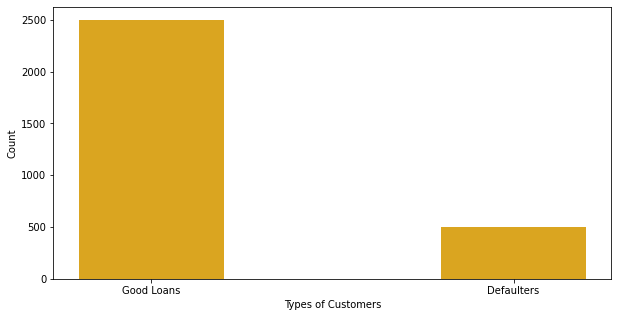

In [12]:
# Creating a bar plot for the type of customers

Types_customer = ["Good Loans", "Defaulters"] 

fig = plt.figure(figsize = (10, 5))
plt.title("")
plt.bar(Types_customer, df["TARGET"].value_counts() , color ='goldenrod', width = 0.4)
plt.xlabel("Types of Customers")
plt.ylabel("Count")
plt.show()

<font color='lightyellow'> We need to extract info from our dataset for a better understanding of it. <br>
It is clear that we have *Null Entries* in our dataset which is most probably <br> because of the lack of *Credit History* of the said customer.

In [13]:
# Displays the column type and number of non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   float64
 1   DerogCnt         3000 non-null   float64
 2   CollectCnt       3000 non-null   float64
 3   BanruptcyInd     3000 non-null   float64
 4   InqCnt06         3000 non-null   float64
 5   InqTimeLast      2812 non-null   float64
 6   InqFinanceCnt24  3000 non-null   float64
 7   TLTimeFirst      3000 non-null   float64
 8   TLTimeLast       3000 non-null   float64
 9   TLCnt03          3000 non-null   float64
 10  TLCnt12          3000 non-null   float64
 11  TLCnt24          3000 non-null   float64
 12  TLCnt            2997 non-null   float64
 13  TLSum            2960 non-null   float64
 14  TLMaxSum         2960 non-null   float64
 15  TLSatCnt         2996 non-null   float64
 16  TLDel60Cnt       3000 non-null   float64
 17  TLBadCnt24    

In [14]:
# Display the various stats of our dataset
df.describe()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,0.275000,...,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,0.582084,...,3.108076,0.266486,0.234759,1.163633,1.609508,3.407255,0.206722,2.460434,1.806124,0.480105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,...,2.000000,0.501100,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,...,3.000000,0.695500,0.527050,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,0.000000,...,6.000000,0.840650,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


### <font color='lightgreen'>Identify and treatment of nulls in Data

In [15]:
# Number of null values in each feature variable
sum = df.isna().sum() 

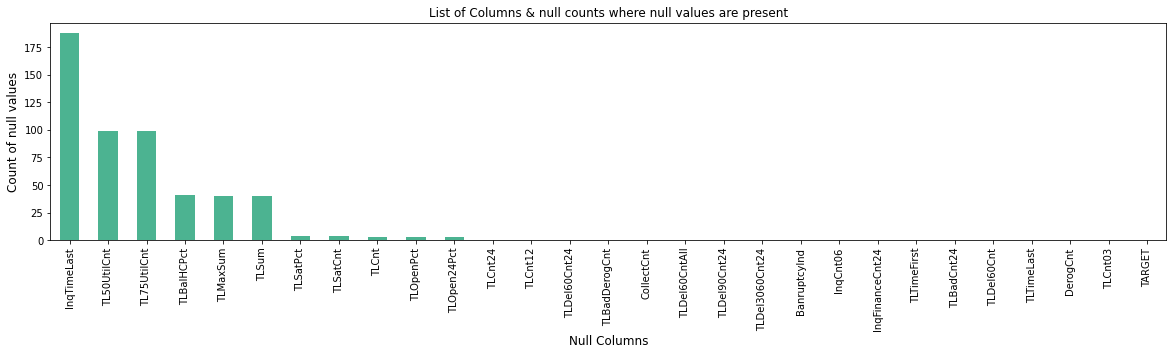

In [16]:
# Creating a dataframe giving total number of null count in each feature
null_col = df.isnull().sum().sort_values(ascending = False)

# Plotting the null count in the given data set.
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are present') 

plt.xlabel("Null Columns",fontdict={"fontsize":12})                 
plt.ylabel("Count of null values",fontdict={"fontsize":12})
plt.show()

In [17]:
# Maximum number of Null Entries in a column
df.isna().sum().max()

188

<font color='lightyellow'>Seprating the feature variables with null entries to measure the distortion <br>
in our dataset after we predict the missing values.

In [18]:
# Creating a dataset with each variable and number of null entries in the same
df_na = pd.DataFrame({'Category':sum.index, 'Sums':sum.values})

In [19]:
# Extracting only variables with null entries
df_na = df_na[df_na["Sums"]!=0] 

# Displaying those variables 
pd.Index(df_na["Category"])

Index(['InqTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt',
       'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct'],
      dtype='object', name='Category')

In [20]:
df[['InqTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt',
       'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct']].isna().sum()

InqTimeLast    188
TLCnt            3
TLSum           40
TLMaxSum        40
TLSatCnt         4
TL75UtilCnt     99
TL50UtilCnt     99
TLBalHCPct      41
TLSatPct         4
TLOpenPct        3
TLOpen24Pct      3
dtype: int64

In [21]:
df[['InqTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt',
       'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct']].describe()

,InqTimeLast,TLCnt,TLSum,TLMaxSum,TLSatCnt,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct
count,2812.000000,2997.000000,2960.000000,2960.000000,2996.000000,2901.000000,2901.000000,2959.000000,2996.000000,2997.000000,2997.000000
mean,3.108108,7.879546,20151.095608,31205.900676,13.511682,3.121682,4.077904,0.648178,0.518331,0.496168,0.564219
std,4.637831,5.421595,19682.086262,29092.908099,8.931769,2.605435,3.108076,0.266486,0.234759,0.206722,0.480105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,5699.750000,10236.000000,6.000000,1.000000,2.000000,0.501100,0.352900,0.344800,0.250000
50%,1.000000,7.000000,15546.500000,24188.500000,12.000000,3.000000,3.000000,0.695500,0.527050,0.500000,0.500000
75%,3.000000,11.000000,28303.250000,44756.250000,19.000000,4.000000,6.000000,0.840650,0.681800,0.625000,0.800000
max,24.000000,40.000000,210612.000000,271036.000000,57.000000,20.000000,23.000000,3.361300,1.000000,1.000000,6.000000


### <font color='lightgreen'>Solving Issue of **Lack Of Credit History**


**<font color='lightyellow'>Since we will be presenting 2 Methods to Impute the Missing Values.**<br>
**<font color='lightyellow'>We make copies of our dataset df**

In [22]:
# Making 2 datasets to compute the accuracy of each imputation
df_simple = df.copy()
df_kNN = df.copy()
#Removing Data is not a solution

#### <font color='lightgreen'>Missing data imputation Using Simple Imputation
**<font color='lightyellow'>In statistics, imputation is the process of replacing missing data with substituted values.** <br>
Completing our dataset by filling the missing information using the row average method for that feature variable.<br>


In [23]:
# Imputer object using the mean strategy and
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')

In [24]:
# Fitting the data to the imputer object
imputer = imputer.fit(df_simple)

In [25]:
# Imputing all the missing values
df_simple_trans = imputer.transform(df_simple)

<font color='lightyellow'> The missing values are now replaced with the imputed values by calculating the mean and <br>
is stored in the new dataframe *df_simple_trans*

In [26]:
# Converting the array into a dataframe and displaying its info
df_simple_trans = pd.DataFrame(data = df_simple_trans, index = df_simple.index, columns = df_simple.columns)
df_simple_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   float64
 1   DerogCnt         3000 non-null   float64
 2   CollectCnt       3000 non-null   float64
 3   BanruptcyInd     3000 non-null   float64
 4   InqCnt06         3000 non-null   float64
 5   InqTimeLast      3000 non-null   float64
 6   InqFinanceCnt24  3000 non-null   float64
 7   TLTimeFirst      3000 non-null   float64
 8   TLTimeLast       3000 non-null   float64
 9   TLCnt03          3000 non-null   float64
 10  TLCnt12          3000 non-null   float64
 11  TLCnt24          3000 non-null   float64
 12  TLCnt            3000 non-null   float64
 13  TLSum            3000 non-null   float64
 14  TLMaxSum         3000 non-null   float64
 15  TLSatCnt         3000 non-null   float64
 16  TLDel60Cnt       3000 non-null   float64
 17  TLBadCnt24    

#### <font color='lightgreen'>Missing data imputation Using kNN Imputation
<font color='lightyellow'>Using  *Nearest Neighbour Imputation Strategy* for missing data and replace missing values for each column in the input data prior <br>
to prediction.<br>
Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements <br>
or unavailability. <br>
We will create a model to predict the missing values. A model is created for each feature that has missing values, taking as input <br>
values of perhaps all other input features. Using *K-nearest neighbor model* , a new sample is imputed by finding the samples in the <br>
training set “closest” to it and averaging the nearby points to fill in the value.<br>
We will show that *kNN impute* appears to provide a more robust and sensitive method for missing value estimation and kNN impute surpass the <br>
commonly used *row average method* (as well as filling missing values with zeros). Configuration of KNN imputation often involves selecting <br>
the distance measure (e.g. Euclidean) and the number of contributing neighbors for each prediction, the k hyperparameter of the KNN algorithm.


In [27]:
# Defining Imputer object
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

In [28]:
# Fitting the data to the imputer object
imputer.fit(df_kNN)

KNNImputer(n_neighbors=3)

In [29]:
# Imputing all the missing values
df_kNN_trans = imputer.transform(df_kNN)

<font color='lightyellow'>We get the complete predicted data set in array form, which is now converted to a final <br>
dataframe *df_kNN_trans*

In [30]:
# Converting the array into a dataframe
df_kNN_trans = pd.DataFrame(data = df_kNN_trans, index = df_kNN.index, columns = df_kNN.columns)

In [31]:
df_kNN_trans.head()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,0.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,0.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,0.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,0.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,0.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


In [32]:
df_kNN_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   float64
 1   DerogCnt         3000 non-null   float64
 2   CollectCnt       3000 non-null   float64
 3   BanruptcyInd     3000 non-null   float64
 4   InqCnt06         3000 non-null   float64
 5   InqTimeLast      3000 non-null   float64
 6   InqFinanceCnt24  3000 non-null   float64
 7   TLTimeFirst      3000 non-null   float64
 8   TLTimeLast       3000 non-null   float64
 9   TLCnt03          3000 non-null   float64
 10  TLCnt12          3000 non-null   float64
 11  TLCnt24          3000 non-null   float64
 12  TLCnt            3000 non-null   float64
 13  TLSum            3000 non-null   float64
 14  TLMaxSum         3000 non-null   float64
 15  TLSatCnt         3000 non-null   float64
 16  TLDel60Cnt       3000 non-null   float64
 17  TLBadCnt24    

#### <font color='lightyellow'>We have overcome the problem of missing values in our dataset.<br>Or we can say the issue of lack of significant credit history
#### Since kNN Imputation is more accurate, we will be working on dataset with kNN Imputed Values


In [33]:
df = df_kNN_trans.copy() # Updating df with our dataset worked upon via kNN Imputation & no null values

In [34]:
df.head()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,0.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,0.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,0.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,0.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,0.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   float64
 1   DerogCnt         3000 non-null   float64
 2   CollectCnt       3000 non-null   float64
 3   BanruptcyInd     3000 non-null   float64
 4   InqCnt06         3000 non-null   float64
 5   InqTimeLast      3000 non-null   float64
 6   InqFinanceCnt24  3000 non-null   float64
 7   TLTimeFirst      3000 non-null   float64
 8   TLTimeLast       3000 non-null   float64
 9   TLCnt03          3000 non-null   float64
 10  TLCnt12          3000 non-null   float64
 11  TLCnt24          3000 non-null   float64
 12  TLCnt            3000 non-null   float64
 13  TLSum            3000 non-null   float64
 14  TLMaxSum         3000 non-null   float64
 15  TLSatCnt         3000 non-null   float64
 16  TLDel60Cnt       3000 non-null   float64
 17  TLBadCnt24    

In [36]:
df.describe()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.166667,1.430000,0.857000,0.153333,3.108333,3.031000,3.555000,170.113667,11.873667,0.275000,...,3.963111,0.648011,0.518102,0.726000,0.814667,2.522000,0.496263,1.409000,1.068333,0.563803
std,0.372740,2.731469,2.161352,0.360369,3.479171,4.518525,4.477536,92.813700,16.321412,0.582084,...,3.122125,0.265845,0.234719,1.163633,1.609508,3.407255,0.206714,2.460434,1.806124,0.480076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,...,2.000000,0.501325,0.352175,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,...,3.000000,0.694450,0.526300,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,0.000000,...,5.000000,0.840600,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


### <font color='lightgreen'> Correlation & Outliers


#### <font color='lightgreen'> Correlation 

In [37]:
# Correlation Values for all our feature variables
corr_ls = {}
for i in df.columns:
    print(i,end=" : ")
    print(df["TARGET"].corr(df[i]))
    corr_ls[i] = df["TARGET"].corr(df[i])

TARGET : 1.0
DerogCnt : 0.08809950482569659
CollectCnt : 0.09374759560019381
BanruptcyInd : 0.02565139056126972
InqCnt06 : 0.10666335429785379
InqTimeLast : -0.028542076710441185
InqFinanceCnt24 : 0.13256206912118884
TLTimeFirst : -0.06959733719304602
TLTimeLast : 0.03064791423716407
TLCnt03 : -0.036116022494479406
TLCnt12 : -0.012390690239577746
TLCnt24 : -0.009525041339920354
TLCnt : -0.044204064257297684
TLSum : 0.009987979199148704
TLMaxSum : -0.04795084455076175
TLSatCnt : -0.07904578452533391
TLDel60Cnt : 0.18594205222497795
TLBadCnt24 : 0.16379569726446566
TL75UtilCnt : 0.09599649620267107
TL50UtilCnt : 0.07080425163237893
TLBalHCPct : 0.1678454075419042
TLSatPct : -0.25394861873673336
TLDel3060Cnt24 : 0.2337087117687172
TLDel90Cnt24 : 0.21157735151504048
TLDel60CntAll : 0.1958626353313442
TLOpenPct : -0.06591127975500177
TLBadDerogCnt : 0.20815224890058878
TLDel60Cnt24 : 0.2520259920769917
TLOpen24Pct : 0.03358475553079741


In [38]:
# Series with correlation values sorted 
series = pd.Series(corr_ls).sort_values(ascending = False)

In [39]:
series

TARGET             1.000000
TLDel60Cnt24       0.252026
TLDel3060Cnt24     0.233709
TLDel90Cnt24       0.211577
TLBadDerogCnt      0.208152
TLDel60CntAll      0.195863
TLDel60Cnt         0.185942
TLBalHCPct         0.167845
TLBadCnt24         0.163796
InqFinanceCnt24    0.132562
InqCnt06           0.106663
TL75UtilCnt        0.095996
CollectCnt         0.093748
DerogCnt           0.088100
TL50UtilCnt        0.070804
TLOpen24Pct        0.033585
TLTimeLast         0.030648
BanruptcyInd       0.025651
TLSum              0.009988
TLCnt24           -0.009525
TLCnt12           -0.012391
InqTimeLast       -0.028542
TLCnt03           -0.036116
TLCnt             -0.044204
TLMaxSum          -0.047951
TLOpenPct         -0.065911
TLTimeFirst       -0.069597
TLSatCnt          -0.079046
TLSatPct          -0.253949
dtype: float64

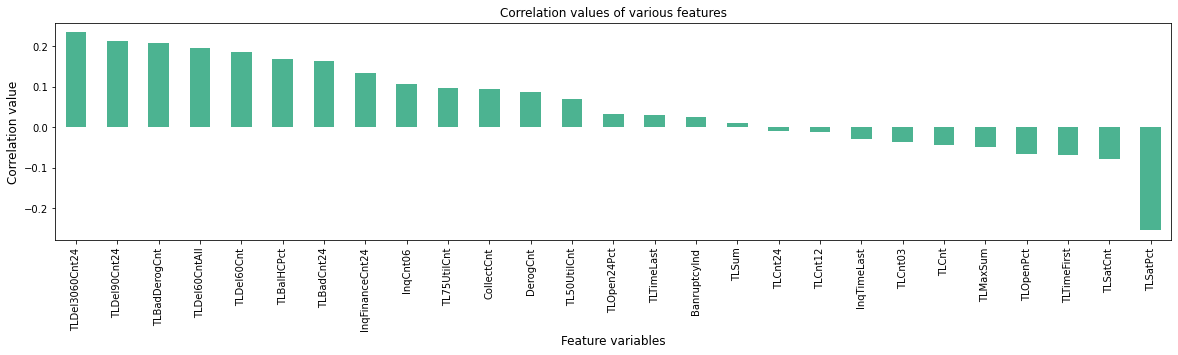

In [40]:
# Plotting the correlation values in the given data set.
plt.figure(figsize=(20,4))
series[2:].plot(kind='bar', color="#4CB391")                           
plt.title('Correlation values of various features') 

plt.xlabel("Feature variables",fontdict={"fontsize":12})                 
plt.ylabel("Correlation value",fontdict={"fontsize":12})
plt.show()

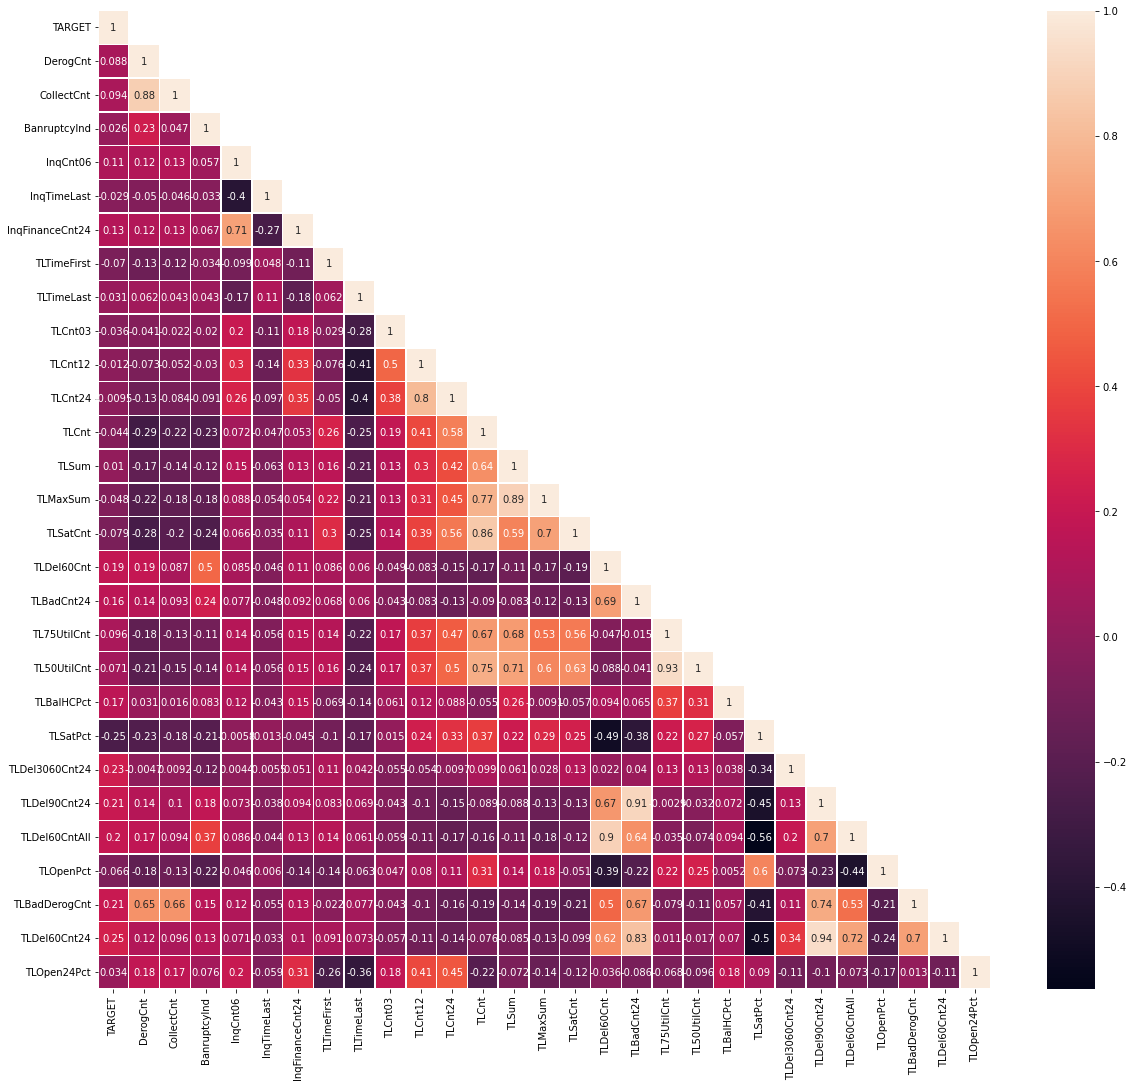

In [41]:
corr = df.corr()
plt.figure(figsize=(20,18))
# Convert correlation to numpy array
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False # To show only the lower triangle
sns.heatmap(corr, annot= True, linewidths=.5, mask = mask); # Plotting the color coded correlation matrix

#### <font color='lightgreen'> Outliers

<font color = "lightyellow">Plotting the boxplots for highly correlated attributes to analyze the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


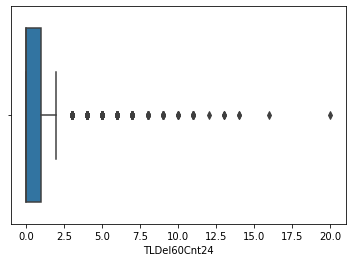

In [42]:
sns.boxplot(df_kNN_trans["TLDel60Cnt24"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


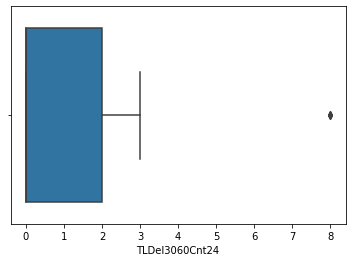

In [43]:
sns.boxplot(df_kNN_trans["TLDel3060Cnt24"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


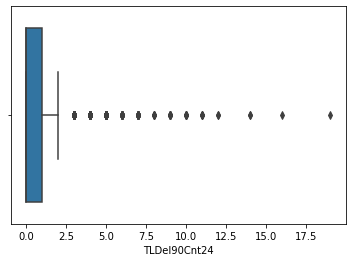

In [44]:
sns.boxplot(df_kNN_trans["TLDel90Cnt24"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


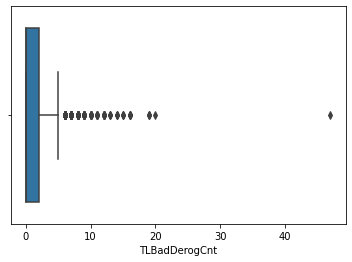

In [45]:
sns.boxplot(df_kNN_trans["TLBadDerogCnt"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


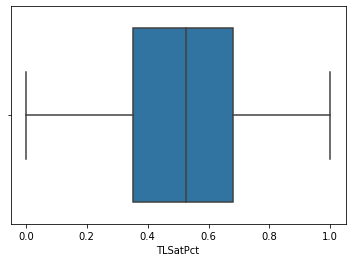

In [46]:
sns.boxplot(df_kNN_trans["TLSatPct"]);

<font color = "lightyellow"> As can be seen the last attribute *TLSatPct* which is highly negatively correlated <br>
has zero outliers and thus can be neglected while analyzing outliers

In [47]:
# Dataset with no data removed
df_ol = df.copy()

In [48]:
# Highly correlated feature variables with our Target variable
# Removing Outliers only from them for the sake of not losing much data
# Not considering TLSatPct as it has zero outliers
ol_series = series.index[1:5]
ol_series

Index(['TLDel60Cnt24', 'TLDel3060Cnt24', 'TLDel90Cnt24', 'TLBadDerogCnt'], dtype='object')

In [49]:
# Function to calculate the range of our box
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
#Remove outliers for col
for i in ol_series:
    lower_1, upper_1 = remove_outlier(df[i])
    df = df.loc[(df[i] > lower_1) & (df[i] < upper_1)] 


In [50]:
df.shape

(2086, 29)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


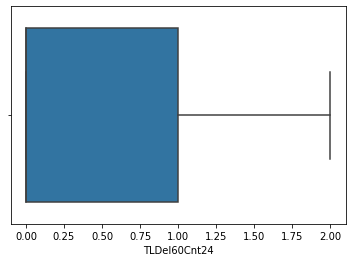

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-------


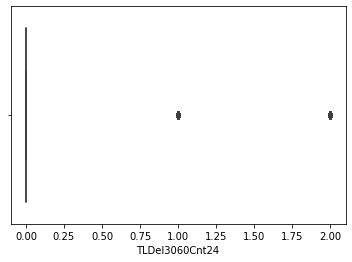

-------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


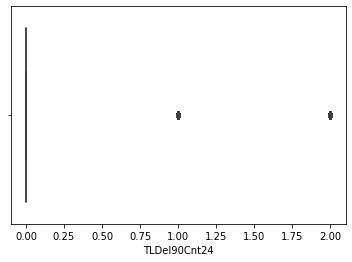

-------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


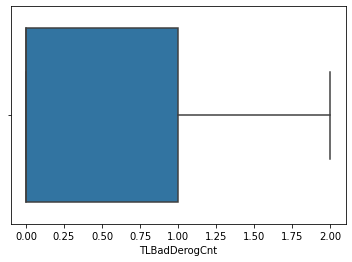

-------


In [51]:
# To check whether the outliers have been removed or not
for col in ol_series:
  sns.boxplot(df[col])
  plt.show()

  print("-------")

<font color = "lightyellow"> As we can see, all the outliers of highly correlated attributes have been removed

## <font color='lightgreen'> Model Building With Major Outliers Removed

### <font color='lightgreen'>Train Test Split

In [52]:
#separating the dataset into feature variables(X) and target variable(y)
y = df.iloc[:, 0].values
X = df.iloc[:, 1:29].values

In [53]:
# splitting dataset into training and test (in ratio 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
# normalising the train and test sets
#The goal of normalisation is to change the values of numeric columns in the dataset to use a common scale, without distorting 
#differences in the ranges of values or losing information.This improves the performance and training stability of the model.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <font color='yellow'>Risk Model building Using Logistic Regression

Logistic regression is used for predicting the categorical
dependent variable using a given set of independent variables.
Logistic regression predicts the output of a categorical dependent variable.Therefore the outcome must be a categorical or
discrete value. It can be either Yes or No, 0 or 1, true or False,
etc. It gives
the probabilistic values which lie between 0 and 1.

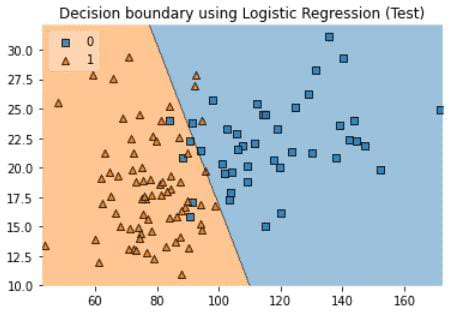

In [55]:
#building the logistic regression classifier
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred_LR = classifier.predict(X_test)

#### <font color='yellow'>Model performance

Confusion Matrix : A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.Let us take an example of confusion matrix.

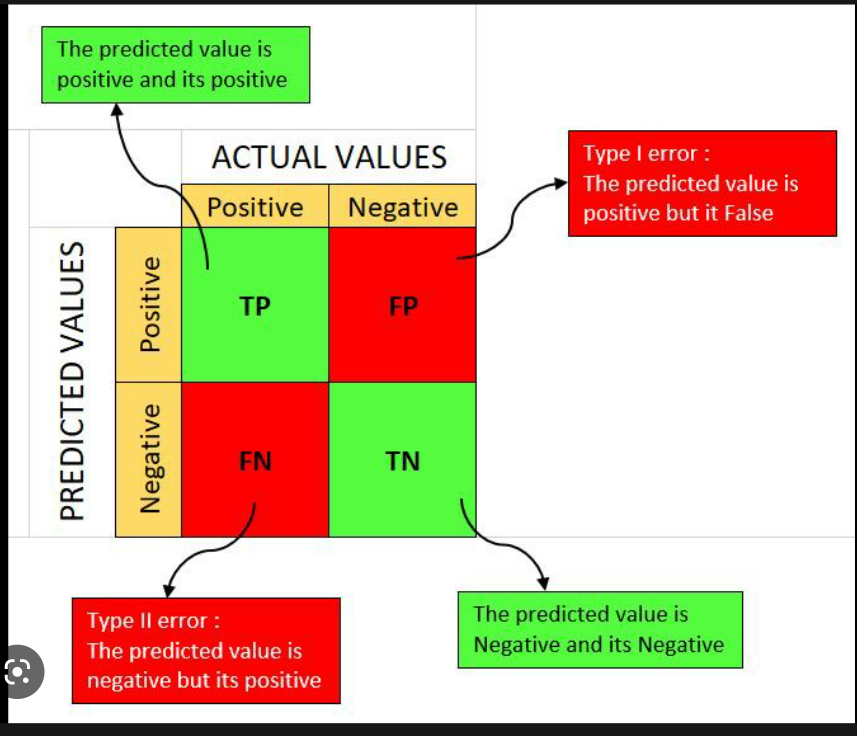

* true positives (TP): These are cases in which we predicted yes and the true value is indeed yes.
* true negatives (TN): We predicted no, and the true value is also no.
* false positives (FP): We predicted yes, but the true value is no.
* false negatives (FN): We predicted no, but the value is yes. 

In [56]:
# evaluating the model with confusion matrix.
print(confusion_matrix(y_test,y_pred_LR))

[[379   1]
 [ 35   3]]


In [57]:
cm_lr = confusion_matrix(y_test,y_pred_LR)

In [58]:
# evaluating the accuracy of model
# The percentage of labels that our model successfully predicted is represented by accuracy
print(accuracy_score(y_test, y_pred_LR))

0.9138755980861244


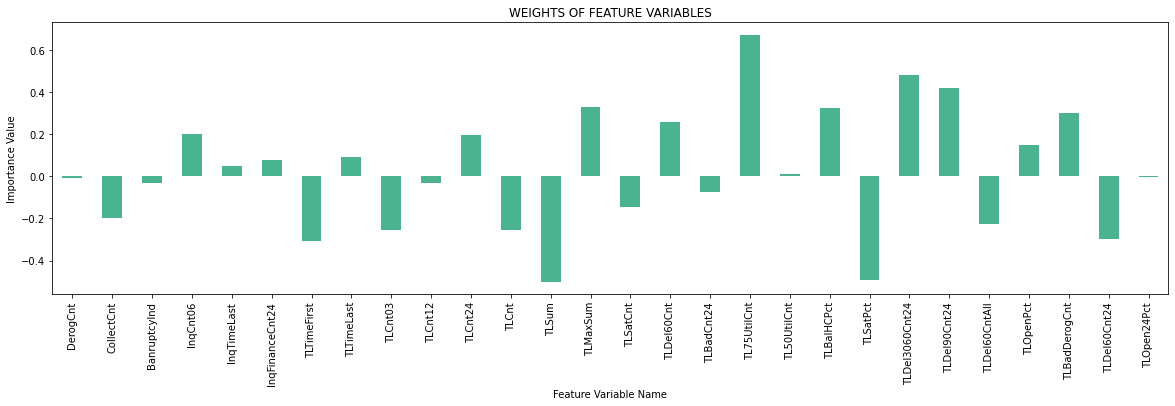

In [59]:
#the plot below shows the weights assigned to feature variables in logistic regression according to their correlation values.
coef = classifier.coef_[0]
plt.figure(figsize=(20,5))
weights = (pd.Series(coef, index = df_kNN_trans.drop("TARGET", axis =1).columns))
weights.plot(kind='bar', color="#4CB391")   
plt.title("WEIGHTS OF FEATURE VARIABLES")
plt.xlabel("Feature Variable Name")
plt.ylabel("Importance Value");

### <font color='yellow'>Risk Model building Using k-NN

KNN is mostly used to make classifications or predictions about the grouping of an individual data point. It
measures/stores all available cases and classifies new cases(test or unseen data)
based on a similarity measure. It serves as an example of
a non- parametric statistical approach and is based on an
assumption that similar inputs have similar outputs. Given a
positive integer K and a test observation x0, this classifier first
identifies K points that are closest to x0 in the training data set
represented by N0 and then kNN classifies the test observation
x0 to the class that has the highest probability.

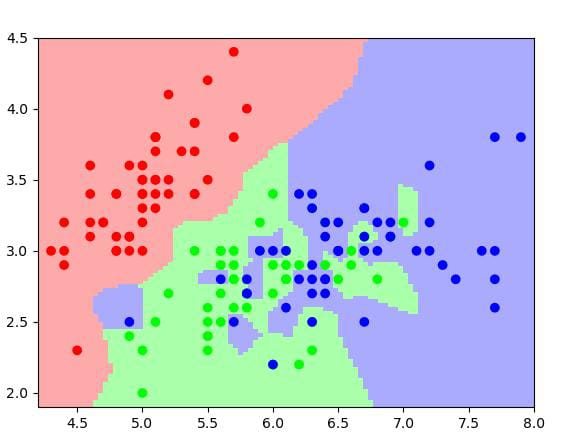

In [60]:
#building the knn classifier.
#here we choose K = 3.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_pred_kNN = knn.predict(X_test)
cm_knn = confusion_matrix(y_test,y_pred_kNN)

In [62]:
#evaluating the model with confusion matrix.
print(confusion_matrix(y_test,y_pred_kNN))

[[369  11]
 [ 36   2]]


In [63]:
# evaluating the accuracy of model
print(accuracy_score(y_test, y_pred_kNN))

0.8875598086124402


### <font color='yellow'>Risk Model building Using Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. A decision tree is a decision model and all of the possible outcomes that decision trees might hold. This might include the utility, outcomes, and input costs, that uses a flowchart-like tree structure.The node's result is represented by the branches/edges, and either of the following are contained in the nodes:


*   [Decision Nodes] Conditions
*   [End Nodes] Result



In [64]:
#building out DT model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
y_pred_DT = clf.predict(X_test)
cm_DT = confusion_matrix(y_test,y_pred_DT)

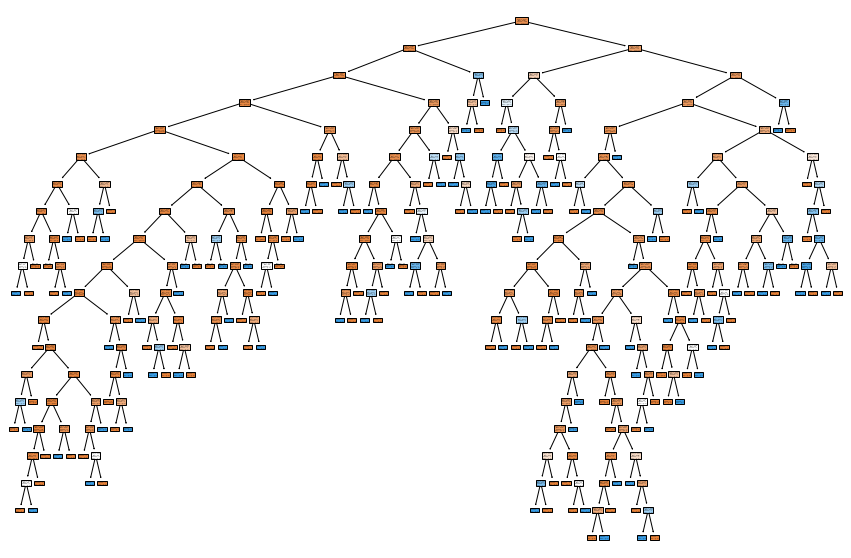

In [66]:
#visualisation of decision tree
plt.figure(figsize=(15,10))
sklearn.tree.plot_tree(clf,filled=True)
plt.show()

In [67]:
#evaluating the model with confusion matrix.
print(confusion_matrix(y_test,y_pred_DT))

[[331  49]
 [ 34   4]]


In [68]:
# evaluating the accuracy of model
print(accuracy_score(y_test, y_pred_DT))

0.8014354066985646


### <font color='yellow'>Risk Model building Using RandomForestClassifier

The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

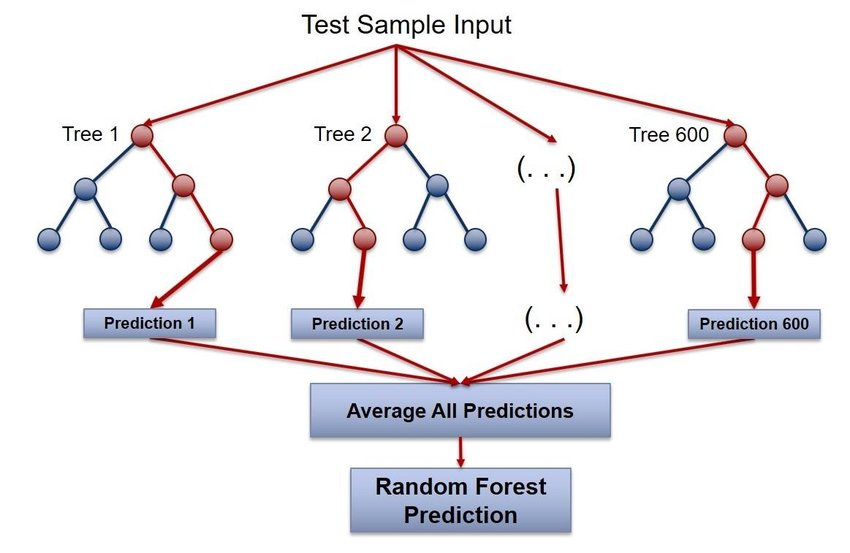

In [69]:
#building our RFC model with 20 DT
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=5, random_state=0)
clf_random.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=20, random_state=0)

In [70]:
# Build Forward Stepwise Selection
# Trying to select maximum relevant features
# Checking for set of 26 
sfs_RFC = sfs(clf_random,
            k_features=26,
            forward=True,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=5)
# Perform Forward Stepwise Selection
sfs_RFC = sfs_RFC.fit(X_train, y_train)
# Which features?
feat_cols = list(sfs_RFC.k_feature_idx_)
print(feat_cols)

#building our RFC model with 25 DT
clf_random_final = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=0)
clf_random_final.fit(X_train[:,feat_cols], y_train)
y_pred_RFC = clf_random_final.predict(X_test[:,feat_cols])
print(accuracy_score(y_test, y_pred_RFC))
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    5.3s finished

[2022-11-27 10:04:01] Features: 1/26 -- score: 0.8974843106579634[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    5.4s finished

[2022-11-27 10:04:06] Features: 2/26 -- score: 0.898083113053173[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    5.2s finished

[2022-11-27 10:04:11] Features: 3/26 -- score: 0.8968855082627538[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
0.9043062200956937


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished

[2022-11-27 10:05:39] Features: 26/26 -- score: 0.8968855082627536

In [71]:
# Build Forward Stepwise Selection
# Trying to select maximum relevant features
# Checking for set of 27
sfs_RFC = sfs(clf_random,
            k_features=27,
            forward=True,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=5)
# Perform Forward Stepwise Selection
sfs_RFC = sfs_RFC.fit(X_train, y_train)
# Which features?
feat_cols = list(sfs_RFC.k_feature_idx_)
print(feat_cols)
#building our RFC model with 25 DT
clf_random_final = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=0)
clf_random_final.fit(X_train[:,feat_cols], y_train)
y_pred_RFC = clf_random_final.predict(X_test[:,feat_cols])
print(accuracy_score(y_test, y_pred_RFC))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    5.3s finished

[2022-11-27 10:05:44] Features: 1/27 -- score: 0.8974843106579634[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    5.2s finished

[2022-11-27 10:05:49] Features: 2/27 -- score: 0.898083113053173[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    5.1s finished

[2022-11-27 10:05:54] Features: 3/27 -- score: 0.8968855082627538[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
0.9043062200956937


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished

[2022-11-27 10:07:21] Features: 27/27 -- score: 0.8956861052669435

In [72]:
y_pred_RFC = clf_random.predict(X_test) # Considering all 28 feature variables

In [73]:
# evaluating the accuracy of model
print(accuracy_score(y_test, y_pred_RFC))
cm_RFC = confusion_matrix(y_test,y_pred_RFC)

0.9114832535885168


In [74]:
#evaluating the model with confusion matrix.
print(confusion_matrix(y_test,y_pred_RFC))

[[379   1]
 [ 36   2]]


## <font color='lightgreen'> Model Building With Complete Data

### <font color='lightgreen'>Train Test Split

In [75]:
y_ol = df_ol.iloc[:, 0].values
X_ol = df_ol.iloc[:, 1:29].values

In [76]:
# splitting dataset into training and test (in ratio 80:20)

X_train_ol, X_test_ol, y_train_ol, y_test_ol = train_test_split(X_ol, y_ol, test_size=0.2, random_state=0)

In [77]:
# normalising the train and test data
sc = StandardScaler()
X_train_ol = sc.fit_transform(X_train_ol)
X_test_ol = sc.transform(X_test_ol)

### <font color='yellow'>Risk Model building Using Logistic Regression

In [78]:
classifier_ol =  LogisticRegression()
classifier_ol.fit(X_train_ol, y_train_ol)
y_pred_ol_LR = classifier_ol.predict(X_test_ol)
cm_lr_ol = confusion_matrix(y_test_ol,y_pred_ol_LR)

#### <font color='yellow'>Model performance

In [79]:
print(confusion_matrix(y_test_ol,y_pred_ol_LR))

[[484  14]
 [ 87  15]]


In [80]:
print(accuracy_score(y_test_ol, y_pred_ol_LR))

0.8316666666666667


### <font color='yellow'>Risk Model building Using k-NN

In [81]:
knn_ol = KNeighborsClassifier(n_neighbors=3)
knn_ol.fit(X_train_ol, y_train_ol)

KNeighborsClassifier(n_neighbors=3)

In [82]:
y_pred_ol_kNN = knn_ol.predict(X_test_ol)
cm_knn_ol = confusion_matrix(y_test_ol,y_pred_ol_kNN)

In [83]:
print(confusion_matrix(y_test_ol,y_pred_ol_kNN))

[[469  29]
 [ 91  11]]


In [84]:
print(accuracy_score(y_test_ol, y_pred_ol_kNN))

0.8


### <font color='yellow'>Risk Model building Using Decision Trees

In [85]:

clf_ol = DecisionTreeClassifier(random_state=0)
clf_ol.fit(X_train_ol, y_train_ol)

DecisionTreeClassifier(random_state=0)

In [86]:
y_pred_ol_DT = clf.predict(X_test_ol)

In [87]:
# Decision Tree plotted
text_representation = tree.export_text(clf_ol)
print(text_representation)

|--- feature_26 <= -0.32
|   |--- feature_19 <= 1.36
|   |   |--- feature_21 <= 1.09
|   |   |   |--- feature_19 <= 0.83
|   |   |   |   |--- feature_5 <= 3.96
|   |   |   |   |   |--- feature_25 <= 3.72
|   |   |   |   |   |   |--- feature_13 <= -1.06
|   |   |   |   |   |   |   |--- feature_13 <= -1.06
|   |   |   |   |   |   |   |   |--- feature_5 <= -0.01
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_5 >  -0.01
|   |   |   |   |   |   |   |   |   |--- feature_11 <= -1.19
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_11 >  -1.19
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_13 >  -1.06
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_13 >  -1.06
|   |   |   |   |   |   |   |--- feature_17 <= 2.05
|   |   |   |   |   |   |   |   |--- feature_21 <= -0.20
|   |   |   |   |   |   |   |   |   |

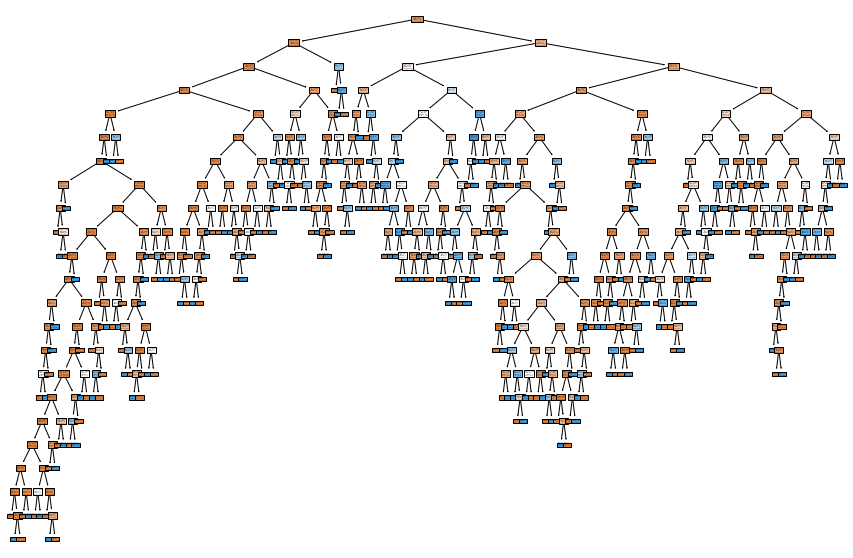

In [88]:
plt.figure(figsize=(15,10))
sklearn.tree.plot_tree(clf_ol,filled=True)
plt.show()

In [89]:
cm_DT_ol = confusion_matrix(y_test_ol,y_pred_ol_DT)
print(confusion_matrix(y_test_ol,y_pred_ol_DT))

[[462  36]
 [ 70  32]]


In [90]:
print(accuracy_score(y_test_ol, y_pred_ol_DT))

0.8233333333333334


### <font color='yellow'>Risk Model building Using RandomForestClassifier

In [91]:
clf_random_ol = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=5, random_state=0)
clf_random_ol.fit(X_train_ol, y_train_ol)

RandomForestClassifier(min_samples_split=5, n_estimators=20, random_state=0)

In [92]:
y_pred_ol_RFC = clf_random_ol.predict(X_test_ol)
cm_RFC_ol = confusion_matrix(y_test_ol,y_pred_ol_RFC)

In [93]:
print(confusion_matrix(y_test_ol,y_pred_ol_RFC))

[[488  10]
 [ 87  15]]


In [94]:
print(accuracy_score(y_test_ol, y_pred_ol_RFC))

0.8383333333333334


## <font color='lightgreen'>Effect of Outlier Removal 

As we can see, on removing the outliers, accuracy of our model increased by nearly 10 % in all, except that of the decision tree. <br> 
By removing outliers, we have increased the accuracy of our training models and
<br>
 we are able to predict better outcomes with lower computaional requirments due to reduced attribute size


### <font color='yellow'>Logistic Regression

In [95]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_LR))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_LR))

When Outliers are Removed
[[379   1]
 [ 35   3]]
When Outliers are not Removed
[[484  14]
 [ 87  15]]


In [96]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_LR))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_LR))

When Outliers are Removed
0.9138755980861244
When Outliers are not Removed
0.8316666666666667


### <font color='yellow'> k Nearest Neighbours

In [97]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_kNN))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_kNN))

When Outliers are Removed
[[369  11]
 [ 36   2]]
When Outliers are not Removed
[[469  29]
 [ 91  11]]


In [98]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_kNN))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_kNN))

When Outliers are Removed
0.8875598086124402
When Outliers are not Removed
0.8


### <font color='yellow'>Decision Trees

In [99]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_DT))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_DT))

When Outliers are Removed
[[331  49]
 [ 34   4]]
When Outliers are not Removed
[[462  36]
 [ 70  32]]


In [100]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_DT))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_DT))

When Outliers are Removed
0.8014354066985646
When Outliers are not Removed
0.8233333333333334


Since decision trees are not affected by the weights of each attributes, the change here is ambiguous.

### <font color='yellow'>Random Forest Classifier

In [101]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_RFC))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_RFC))

When Outliers are Removed
[[379   1]
 [ 36   2]]
When Outliers are not Removed
[[488  10]
 [ 87  15]]


In [102]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_RFC))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_RFC))

When Outliers are Removed
0.9114832535885168
When Outliers are not Removed
0.8383333333333334


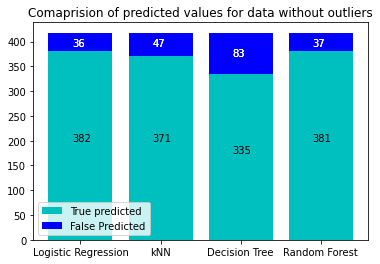

In [103]:
x = ['Logistic Regression', 'kNN','Decision Tree', 'Random Forest']
y1 = [cm_lr[0][0]+cm_lr[1][1], cm_knn[0][0]+cm_knn[1][1], cm_DT[0][0]+cm_DT[1][1], cm_RFC[0][0]+cm_RFC[1][1]]
y2 = [cm_lr[0][1]+cm_lr[1][0], cm_knn[0][1]+cm_knn[1][0], cm_DT[0][1]+cm_DT[1][0], cm_RFC[0][1]+cm_RFC[1][0]]
 
# plot bars in stack manner
plt.bar(x, y1, color='c')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["True predicted", "False Predicted"])
plt.title("Comaprision of predicted values for data without outliers")
plt.text(0.9,390,"47",color = "white")
plt.text(-0.1,390,"36",color = "white")
plt.text(0.9,390,"47",color = "white")
plt.text(-0.1,390,"36",color = "white")
plt.text(0.9,390,"47",color = "white")
plt.text(-0.1,390,"36",color = "white")
plt.text(1.9,370,"83",color = "white")
plt.text(2.9,390,"37",color = "white")
plt.text(1.9,370,"83",color = "white")
plt.text(2.9,390,"37",color = "white")
plt.text(1.9,370,"83",color = "white")
plt.text(2.9,390,"37",color = "white")
plt.text(0.9,200,"371",color = "black")
plt.text(-0.1,200,"382",color = "black")
plt.text(1.9,175,"335",color = "black")
plt.text(2.9,200,"381",color = "black")
plt.show()

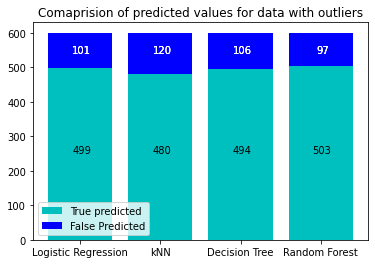

In [104]:
x_ = ['Logistic Regression', 'kNN','Decision Tree', 'Random Forest']
y1_ = [cm_lr_ol[0][0]+cm_lr_ol[1][1], cm_knn_ol[0][0]+cm_knn_ol[1][1], cm_DT_ol[0][0]+cm_DT_ol[1][1], cm_RFC_ol[0][0]+cm_RFC_ol[1][1]]
y2_ = [cm_lr_ol[0][1]+cm_lr_ol[1][0], cm_knn_ol[0][1]+cm_knn_ol[1][0], cm_DT_ol[0][1]+cm_DT_ol[1][0], cm_RFC_ol[0][1]+cm_RFC_ol[1][0]]
 
# plot bars in stack manner
plt.bar(x_, y1_, color='c')
plt.bar(x_, y2_, bottom=y1_, color='b')
plt.legend(["True predicted", "False Predicted"],loc='lower left')
plt.title("Comaprision of predicted values for data with outliers")
plt.text(2.95,540,"97",color = "white")
plt.text(2.95,540,"97",color = "white")
plt.text(2.95,540,"97",color = "white")
plt.text(2.9,250,"503",color = "black")
plt.text(1.9,250,"494",color = "black")
plt.text(1.9,540,"106",color = "white")
plt.text(1.9,540,"106",color = "white")
plt.text(1.9,540,"106",color = "white")
plt.text(0.9,250,"480",color = "black")
plt.text(-0.1,250,"499",color = "black")
plt.text(0.9,540,"120",color = "white")
plt.text(-0.1,540,"101",color = "white")
plt.text(0.9,540,"120",color = "white")
plt.text(-0.1,540,"101",color = "white")
plt.text(0.9,540,"120",color = "white")
plt.text(-0.1,540,"101",color = "white")
plt.show()

## <font color='lightgreen'> Interpretation Of Results

We will move on with the Logistic Regression ML model without considering the outliers as it give a high accuracy with lower computational requirements

In [105]:
# Moving ahead with Logistic Regression performed on data with outliers removed from heavily weighted feature variables
#the first column indicates the probability of good borrower while the second column gives the probability of a fraudulent
predictions = classifier.predict_proba(X_test)
predictions

array([[0.87006693, 0.12993307],
       [0.97046989, 0.02953011],
       [0.81208558, 0.18791442],
       [0.93821524, 0.06178476],
       [0.87607532, 0.12392468],
       [0.93039115, 0.06960885],
       [0.82208999, 0.17791001],
       [0.89385246, 0.10614754],
       [0.93992188, 0.06007812],
       [0.94206873, 0.05793127],
       [0.61640243, 0.38359757],
       [0.97458319, 0.02541681],
       [0.95949789, 0.04050211],
       [0.9647375 , 0.0352625 ],
       [0.90109732, 0.09890268],
       [0.85011706, 0.14988294],
       [0.97376843, 0.02623157],
       [0.96666407, 0.03333593],
       [0.77981473, 0.22018527],
       [0.84230682, 0.15769318],
       [0.83717835, 0.16282165],
       [0.93353511, 0.06646489],
       [0.94049036, 0.05950964],
       [0.88501333, 0.11498667],
       [0.89287675, 0.10712325],
       [0.98731239, 0.01268761],
       [0.95113905, 0.04886095],
       [0.94974256, 0.05025744],
       [0.96009256, 0.03990744],
       [0.74385445, 0.25614555],
       [0.

In [106]:
predictions.shape

(418, 2)

In [107]:
df_final = pd.read_excel("a_Dataset_CreditScoring.xlsx")

In [108]:
# Data set consisting probabilities of dafaulter or good loan
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1']) 
# Data set consisting test data 
df_test_dataset = pd.DataFrame(X_test, columns = df_final.drop(["TARGET", "ID"], axis = 1).columns)
# Data set consisting predicted outcome of borrower from test data
df_prediction_target = pd.DataFrame(y_pred_LR,columns= ['Predicted Outcome'])
# Data set consisting known outcome of borrower from test data
df_target = pd.DataFrame(y_test,columns= ['Original Outcome'])

In [109]:
dfx=pd.concat([df_target, df_prediction_target, df_prediction_prob, df_test_dataset], axis=1)

In [110]:
# Scaling probability of being a punctual borrower between 300 to 900
dfx["Score"] = 300 + dfx["prob_0"]*600

In [111]:
print(accuracy_score(y_test, y_pred_LR))

0.9138755980861244


In [112]:
dfx.head()

,Original Outcome,Predicted Outcome,prob_0,prob_1,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,...,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct,Score
0,0.0,0.0,0.870067,0.129933,0.072806,-0.448575,2.481693,-0.594961,0.384123,-0.313484,...,0.342128,-1.054254,-0.45662,1.249193,4.854093,-1.426161,0.679337,0.927635,-0.831562,822.040157
1,0.0,0.0,0.970470,0.029530,0.072806,-0.448575,-0.402951,-0.594961,-0.039492,-0.313484,...,-1.883608,-0.083894,-0.45662,1.249193,0.179121,-1.828384,0.679337,0.927635,0.914986,882.281937
2,0.0,0.0,0.812086,0.187914,0.072806,0.608238,-0.402951,-0.014613,-0.463107,-0.547859,...,1.504809,-0.417309,-0.45662,1.249193,-0.245877,-0.126562,0.679337,0.927635,0.914986,787.251350
3,0.0,0.0,0.938215,0.061785,0.072806,-0.448575,2.481693,-0.014613,-0.463107,1.092767,...,0.763274,0.805682,-0.45662,-0.534757,-0.670874,0.440554,-0.712720,-0.633712,0.579212,862.929142
4,0.0,0.0,0.876075,0.123925,-0.546785,-0.448575,-0.402951,-0.014613,-0.463107,-0.782234,...,1.107814,1.398732,-0.45662,-0.534757,-0.670874,2.256276,-0.712720,-0.633712,0.187330,825.645194


In [124]:
dfx_final_scores = dfx[["Original Outcome", "Score"]]
dfx_final_scores["Score"].mean()

845.9116616649449

In [114]:
dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"].sort_values(ascending = True)
# Bad Borrowers with their Predicted Credit Score

199    493.585254
282    611.110019
237    628.434306
87     652.622179
329    659.763693
          ...    
274    894.967088
141    895.554279
310    896.493811
348    896.656707
207    897.612799
Name: Score, Length: 380, dtype: float64

In [115]:
dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"].sort_values(ascending = False)
# Good Borrowers with their Predicted Credit Score

256    890.856459
351    885.142436
11     884.749914
251    882.867583
271    878.850322
79     875.737097
91     875.221625
291    868.136776
336    867.490121
397    867.016480
73     861.345658
224    857.451635
49     857.070949
187    855.546425
103    851.254679
148    848.115944
292    843.549544
387    840.318629
75     824.145479
159    823.388041
352    823.257994
107    822.989075
15     810.070234
358    806.366372
231    788.993904
34     786.451500
396    786.446103
36     786.355391
105    783.691093
197    781.121005
175    778.005441
206    774.131444
10     669.841458
112    640.313960
275    603.852652
402    575.504972
401    573.073396
128    537.665177
Name: Score, dtype: float64

### <font color='lightgreen'>Sustainbility 

In [116]:
# Assuming bank gains 100$ from a good loan & loses 500$ from a bad loan
# With beta as threshold value decided by the bank
# Finding the ideal beta value for profit maximisation
pf_plot = {}
for beta in range(300,901):
    Good_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"]>beta))
    Bad_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"]>beta))
    Profit = Good_loans_Cp*100-Bad_loans_Cp*500
    pf_plot[beta] = Profit
pf = pd.Series(pf_plot)
pf

300    19000
301    19000
302    19000
303    19000
304    19000
       ...  
896      300
897      100
898        0
899        0
900        0
Length: 601, dtype: int64

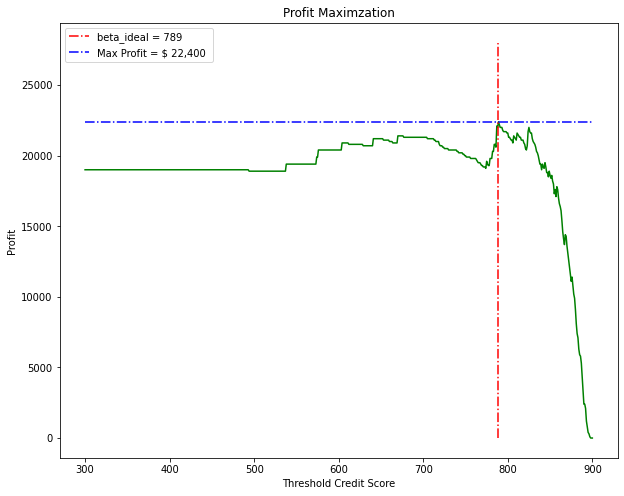

In [117]:
plt.figure(figsize=(10,8))
plt.plot(pf,'g')
plt.plot([789,789],[0,28000],'r-.', label = "beta_ideal = 789")
plt.plot([300,900],[22400,22400],'b-.', label = "Max Profit = $ 22,400 ")
plt.xlabel("Threshold Credit Score")
plt.ylabel("Profit")
plt.title("Profit Maximzation")
plt.legend()

In [118]:
# Threshold value decided by the bank
beta = 789 # Let
Good_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"]>beta))
Bad_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"]>beta))


In [119]:
Good_loans = np.sum(dfx_final_scores["Original Outcome"]==0)
Bad_loans = np.sum(dfx_final_scores["Original Outcome"]==1)
                

In [120]:
print("Number of Good Loans given with threshold limit at %s "% (beta), end = ": ")
print(Good_loans_Cp, end=" Out Of ")
print(Good_loans)
print("Number of Bad Loans given with threshold limit at %s "% (beta), end = ":")
print(Bad_loans_Cp, end=" Out Of ")
print(Bad_loans)

Number of Good Loans given with threshold limit at 789 : 344 Out Of 380
Number of Bad Loans given with threshold limit at 789 :24 Out Of 38


In [121]:

Profit_max = 19000
for beta in range(300,901):
    Good_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"]>beta))
    Bad_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"]>beta))
    Profit = Good_loans_Cp*100-Bad_loans_Cp*500
    if Profit > Profit_max:
        Profit_max = Profit
        beta_ideal = beta
        
        

In [122]:
Profit_max # Max profit possible for a given threshold credit score

22400

In [123]:
beta_ideal # Ideal Threshold Credit Score

789

---
# <font color='red'>Thank You